In [20]:
# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
# Here is the code to load the data
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print("*"*80)
print(boston.data.shape)
print("*"*80)
print(boston.feature_names)
print("*"*80)
print(boston.DESCR)
print("*"*80)
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
********************************************************************************
(506, 13)
********************************************************************************
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
********************************************************************************
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (pa

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
from sklearn.linear_model import LinearRegression

X=bos.drop('PRICE',axis=1)
lm=LinearRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, bos.PRICE, test_size=0.3, random_state=5)

print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

lm.fit(X_train,Y_train)

(354, 13)
(152, 13)
(354,)
(152,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print("Estimated Intercept Coefficient:",lm.intercept_)

Estimated Intercept Coefficient: 31.799718313818037


In [58]:
print("len of coefficients array:",len(lm.coef_))
print("\nEstimated Coefficients",lm.coef_)



len of coefficients array: 13

Estimated Coefficients [-1.53479239e-01  4.13472741e-02 -2.48366000e-02  7.89647769e-01
 -1.30165607e+01  4.03032192e+00 -1.04163366e-02 -1.33585186e+00
  3.18055744e-01 -1.26322534e-02 -9.78680671e-01  1.28217030e-02
 -4.63297797e-01]


In [62]:
# Predicting training set output

pred_train=lm.predict(X_train)

# Predicting validation set output

pred_test=lm.predict(X_test)

# mean square error for the training dataset

mse_train=np.mean((Y_train-pred_train)**2)

# mean square error for the validation dataset

mse_test=np.mean((Y_test-pred_test)**2)



In [81]:
print('\nFitting a model X_train, and calculate MSE with Y_train:',mse_train)
print('\nFitting a model X_train, and calculate MSE with X_test, Y_test:',mse_test)


Fitting a model X_train, and calculate MSE with Y_train: 19.071527965850706

Fitting a model X_train, and calculate MSE with X_test, Y_test: 30.703232207219028


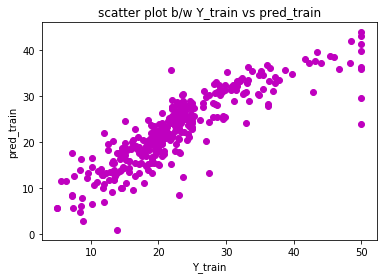

In [82]:
plt.scatter(Y_train,pred_train,c='m')
plt.xlabel("Y_train")
plt.ylabel("pred_train")
plt.title("scatter plot b/w Y_train vs pred_train")
plt.show()

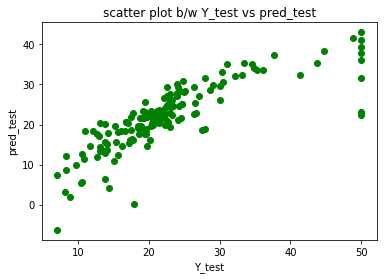

In [67]:
plt.scatter(Y_test,pred_test,c='g')
plt.xlabel("Y_test")
plt.ylabel("pred_test")
plt.title("scatter plot b/w Y_test vs pred_test")
plt.show()

In [64]:
print("End of assignment")

End of assignment
